In [1]:
# Todo: format np.array plotting better, fix significant digit display, if time: fix script so that P vectors are 'column stacked'
# then could use for loops in lambdify cells

import sympy as sp
import numpy as np
sp.init_printing()
from fractions import Fraction
from math import sqrt, sin, cos, pi, radians

In [2]:
# Define symbolic variables
g = sp.symbols("g")
L_torso, L_leg1, L_leg2 = sp.symbols("L_torso"), sp.symbols("L_leg1"), sp.symbols("L_leg2")
m_torso, m_leg1, m_leg2 = sp.symbols("m_torso"), sp.symbols("m_leg1"), sp.symbols("m_leg2")
I_torso, I_leg1, I_leg2 = sp.symbols("I_torso"), sp.symbols("I_leg1"), sp.symbols("I_leg2")

t = sp.symbols("t")
x = sp.Function("x")(t)
y = sp.Function("y")(t)
q1 = sp.Function("q1")(t)
q2 = sp.Function("q2")(t)
q3 = sp.Function("q3")(t)
xdot = sp.symbols("xdot")
ydot = sp.symbols("ydot")
qdot_1 = sp.symbols("qdot_1")
qdot_2 = sp.symbols("qdot_2")
qdot_3 = sp.symbols("qdot_3")

In [3]:
# Define given configurations and velocities, also define robot parameters (moment of inertia's about COM)
L_torso_num, L_leg1_num, L_leg2_num = Fraction(1,2), 1, 1
m_torso_num, m_leg1_num, m_leg2_num = 10, 5, 5
I_torso_num, I_leg1_num, I_leg2_num = 1, Fraction(1,2), Fraction(1,2) 
g_num = 9.81

qi = [Fraction(1,2), Fraction(1,2)*sqrt(3), 150*pi/180, 120*pi/180, 30*pi/180]
qdoti = [-0.8049, -0.4430, 0.0938, 0.9150, 0.9298]
qii = [0.3420, 0.9397, 170*pi/180, 20*pi/180, 30*pi/180]
qdotii = [-0.1225, -0.2369, 0.5310, 0.5904, 0.6263]

In [4]:
# Symbolically compute Torso COM position
torso_pos_COM_x = (Fraction(1,2)*L_torso*sp.sin(q3) + x)
torso_pos_COM_y = (Fraction(1,2)*L_torso*sp.cos(q3) + y)
torso_pos_COM_sym = sp.Matrix([[torso_pos_COM_x], [torso_pos_COM_y]])
display(torso_pos_COM_sym)

⎡Lₜₒᵣₛₒ⋅sin(q₃(t))       ⎤
⎢───────────────── + x(t)⎥
⎢        2               ⎥
⎢                        ⎥
⎢Lₜₒᵣₛₒ⋅cos(q₃(t))       ⎥
⎢───────────────── + y(t)⎥
⎣        2               ⎦

In [5]:
# Symbolically compute Leg 1 COM position
Leg1_pos_COM_x = (-Fraction(1,2)*L_leg1*sp.sin(q1+q3 - sp.pi) + x)
Leg1_pos_COM_y = (-Fraction(1,2)*L_leg1*sp.cos(q1+q3 - sp.pi) + y)
Leg1_pos_COM_sym = sp.Matrix([[Leg1_pos_COM_x], [Leg1_pos_COM_y]])
display(Leg1_pos_COM_sym)

⎡L_leg1⋅sin(q₁(t) + q₃(t))       ⎤
⎢───────────────────────── + x(t)⎥
⎢            2                   ⎥
⎢                                ⎥
⎢L_leg1⋅cos(q₁(t) + q₃(t))       ⎥
⎢───────────────────────── + y(t)⎥
⎣            2                   ⎦

In [6]:
# Symbolically compute Leg 2 COM position
Leg2_pos_COM_x = (Fraction(1,2)*L_leg2*sp.sin(sp.pi - (q2+q3)) + x)
Leg2_pos_COM_y = (-Fraction(1,2)*L_leg2*sp.cos(sp.pi - (q2+q3)) + y)
Leg2_pos_COM_sym = sp.Matrix([[Leg2_pos_COM_x], [Leg2_pos_COM_y]])
display(Leg2_pos_COM_sym)

⎡L_leg2⋅sin(q₂(t) + q₃(t))       ⎤
⎢───────────────────────── + x(t)⎥
⎢            2                   ⎥
⎢                                ⎥
⎢L_leg2⋅cos(q₂(t) + q₃(t))       ⎥
⎢───────────────────────── + y(t)⎥
⎣            2                   ⎦

In [7]:
# Convert symbolic expressions into functions with numerical inputs
torso_pos_COM_x_num = sp.lambdify((x,y,q1,q2,q3,L_torso), torso_pos_COM_x)
torso_pos_COM_y_num = sp.lambdify((x,y,q1,q2,q3,L_torso), torso_pos_COM_y)
torso_pos_COM_num = np.array([[torso_pos_COM_x_num], [torso_pos_COM_y_num]])

Leg1_pos_COM_x_num = sp.lambdify((x,y,q1,q2,q3,L_leg1), Leg1_pos_COM_x)
Leg1_pos_COM_y_num = sp.lambdify((x,y,q1,q2,q3,L_leg1), Leg1_pos_COM_y)
Leg1_pos_COM_num = np.array([[Leg1_pos_COM_x_num], [Leg1_pos_COM_y_num]])

Leg2_pos_COM_x_num = sp.lambdify((x,y,q1,q2,q3,L_leg2), Leg2_pos_COM_x)
Leg2_pos_COM_y_num = sp.lambdify((x,y,q1,q2,q3,L_leg2), Leg2_pos_COM_y)
Leg2_pos_COM_num = np.array([[Leg2_pos_COM_x_num], [Leg2_pos_COM_y_num]])

In [8]:
# Compute COM position matrix for (i), units are in (m)
P_i_COM = np.array([[torso_pos_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_torso_num),
      Leg1_pos_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_leg1_num),
      Leg2_pos_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_leg2_num)], 
          
          [torso_pos_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_torso_num),
      Leg1_pos_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_leg1_num),
      Leg2_pos_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],L_leg2_num)]])
P_i_COM = np.array(P_i_COM)
print(P_i_COM, '*units in m')

[[0.625      0.5        0.75      ]
 [1.08253175 0.3660254  0.4330127 ]] *units in m


In [9]:
# Compute COM position matrix for (ii), units are in (m)
P_ii_COM = np.array([[torso_pos_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_torso_num),
      Leg1_pos_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_leg1_num),
      Leg2_pos_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_leg2_num)],
            
           [torso_pos_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_torso_num),
      Leg1_pos_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_leg1_num),
      Leg2_pos_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],L_leg2_num)]])
print(P_ii_COM, '*units in m')

[[0.467      0.17098993 0.72502222]
 [1.15620635 0.46985369 1.2610938 ]] *units in m


In [10]:
# Symbolically compute torso COM velocity
torso_vel_COM_x = sp.diff(torso_pos_COM_x, t)
torso_vel_COM_y = sp.diff(torso_pos_COM_y, t)
torso_vel_COM_sym = sp.Matrix([[torso_vel_COM_x], [torso_vel_COM_y]])

sp.simplify(torso_vel_COM_sym)

⎡                   d                    ⎤
⎢ Lₜₒᵣₛₒ⋅cos(q₃(t))⋅──(q₃(t))            ⎥
⎢                   dt          d        ⎥
⎢ ─────────────────────────── + ──(x(t)) ⎥
⎢              2                dt       ⎥
⎢                                        ⎥
⎢                    d                   ⎥
⎢  Lₜₒᵣₛₒ⋅sin(q₃(t))⋅──(q₃(t))           ⎥
⎢                    dt          d       ⎥
⎢- ─────────────────────────── + ──(y(t))⎥
⎣               2                dt      ⎦

In [11]:
# Symbolically compute Leg 1 COM velocity
Leg1_vel_COM_x = sp.diff(Leg1_pos_COM_x, t)
Leg1_vel_COM_y = sp.diff(Leg1_pos_COM_y, t)
Leg1_vel_COM_sym = sp.Matrix([[Leg1_vel_COM_x], [Leg1_vel_COM_y]])

sp.simplify(Leg1_vel_COM_sym)

⎡        ⎛d           d        ⎞                               ⎤
⎢ L_leg1⋅⎜──(q₁(t)) + ──(q₃(t))⎟⋅cos(q₁(t) + q₃(t))            ⎥
⎢        ⎝dt          dt       ⎠                      d        ⎥
⎢ ───────────────────────────────────────────────── + ──(x(t)) ⎥
⎢                         2                           dt       ⎥
⎢                                                              ⎥
⎢         ⎛d           d        ⎞                              ⎥
⎢  L_leg1⋅⎜──(q₁(t)) + ──(q₃(t))⎟⋅sin(q₁(t) + q₃(t))           ⎥
⎢         ⎝dt          dt       ⎠                      d       ⎥
⎢- ───────────────────────────────────────────────── + ──(y(t))⎥
⎣                          2                           dt      ⎦

In [12]:
# Symbolically compute Leg 2 COM velocity
Leg2_vel_COM_x = sp.diff(Leg2_pos_COM_x, t)
Leg2_vel_COM_y = sp.diff(Leg2_pos_COM_y, t)
Leg2_vel_COM_sym = sp.Matrix([[Leg2_vel_COM_x], [Leg2_vel_COM_y]])

sp.simplify(Leg2_vel_COM_sym)

⎡        ⎛d           d        ⎞                               ⎤
⎢ L_leg2⋅⎜──(q₂(t)) + ──(q₃(t))⎟⋅cos(q₂(t) + q₃(t))            ⎥
⎢        ⎝dt          dt       ⎠                      d        ⎥
⎢ ───────────────────────────────────────────────── + ──(x(t)) ⎥
⎢                         2                           dt       ⎥
⎢                                                              ⎥
⎢         ⎛d           d        ⎞                              ⎥
⎢  L_leg2⋅⎜──(q₂(t)) + ──(q₃(t))⎟⋅sin(q₂(t) + q₃(t))           ⎥
⎢         ⎝dt          dt       ⎠                      d       ⎥
⎢- ───────────────────────────────────────────────── + ──(y(t))⎥
⎣                          2                           dt      ⎦

In [13]:
# Convert expressions into functions with numerical inputs (for velocity now)

# Subsitute symbolic qdot values into functions 
torso_vel_COM_x_inter = torso_vel_COM_x.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

Leg1_vel_COM_x_inter = Leg1_vel_COM_x.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

Leg2_vel_COM_x_inter = Leg2_vel_COM_x.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

torso_vel_COM_y_inter = torso_vel_COM_y.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

Leg1_vel_COM_y_inter = Leg1_vel_COM_y.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

Leg2_vel_COM_y_inter = Leg2_vel_COM_y.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

# lambdify
torso_vel_COM_x_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_torso), torso_vel_COM_x_inter)
Leg1_vel_COM_x_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_leg1), Leg1_vel_COM_x_inter)
Leg2_vel_COM_x_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_leg2), Leg2_vel_COM_x_inter)

torso_vel_COM_y_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_torso), torso_vel_COM_y_inter)
Leg1_vel_COM_y_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_leg1), Leg1_vel_COM_y_inter)
Leg2_vel_COM_y_num = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_leg2), Leg2_vel_COM_y_inter)

# organize into numpy arrays for later use
torso_vel_COM_num = np.array([[torso_vel_COM_x_num], [torso_vel_COM_y_num]])
Leg1_vel_COM_num = np.array([[Leg1_vel_COM_x_num], [Leg1_vel_COM_y_num]])
Leg2_vel_COM_num = np.array([[Leg2_vel_COM_x_num], [Leg2_vel_COM_y_num]])

In [14]:
# Compute COM velocity matrix for (i), units are in (m/s)
V_i_COM = np.array([[torso_vel_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_torso_num),
      Leg1_vel_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_leg1_num),
      Leg2_vel_COM_num[0][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_leg2_num)],
          
           [torso_vel_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_torso_num),
      Leg1_vel_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_leg1_num),
      Leg2_vel_COM_num[1][0](qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_leg2_num)]])

print(V_i_COM, '*units in m/s')

[[-0.60359239 -1.3167     -1.60372183]
 [-0.559225   -0.443      -0.9042    ]] *units in m/s


In [15]:
# Compute COM velocity matrix for (i), units are in (m/s)
V_ii_COM = np.array([[torso_vel_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_torso_num),
      Leg1_vel_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_leg1_num),
      Leg2_vel_COM_num[0][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_leg2_num)],
           
           [torso_vel_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_torso_num),
      Leg1_vel_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_leg1_num),
      Leg2_vel_COM_num[1][0](qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_leg2_num)]])

print(V_ii_COM, '*units in m/s')

[[ 0.01309793 -0.66625314  0.26853984]
 [-0.3151875  -0.03899004 -0.70292314]] *units in m/s


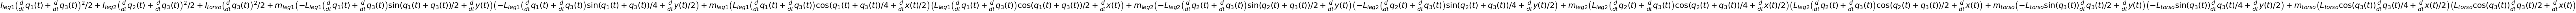

In [16]:
# Symbolically compute Kinetic Energy of the system 
KE_torso = ( Fraction(1,2)*sp.Transpose(torso_vel_COM_sym)
            *m_torso*torso_vel_COM_sym +
            Fraction(1,2)*I_torso*(sp.diff(q3, t)**2)*sp.Matrix([[1]]) )

KE_leg1 = ( Fraction(1,2)*sp.Transpose(Leg1_vel_COM_sym)
            *m_leg1*Leg1_vel_COM_sym +
            Fraction(1,2)*I_leg1*(sp.diff(q3+q1, t)**2)*sp.Matrix([[1]]) )

KE_leg2 = ( Fraction(1,2)*sp.Transpose(Leg2_vel_COM_sym)
            *m_leg2*Leg2_vel_COM_sym +
            Fraction(1,2)*I_leg2*(sp.diff(q3+q2, t)**2)*sp.Matrix([[1]]) )

KE_tot = KE_torso + KE_leg1 + KE_leg2
display(KE_tot[0])

In [17]:
# Now numerically compute KE of system for (i) and (ii)
KE_tot = KE_tot[0]
KE_tot = KE_tot.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
    sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

KE_tot = sp.lambdify((x,y,q1,q2,q3,xdot,ydot,qdot_1,qdot_2,qdot_3,L_torso,L_leg1,L_leg2,
                     m_torso,m_leg1,m_leg2,I_torso,I_leg1,I_leg2), KE_tot)

In [18]:
# Total KE for (i), units are in Joules
print(KE_tot(qi[0],qi[1],qi[2],qi[3],qi[4],qdoti[0],qdoti[1],qdoti[2],qdoti[3],qdoti[4],L_torso_num,L_leg1_num,L_leg2_num,
              m_torso_num,m_leg1_num,m_leg2_num,I_torso_num,I_leg1_num,I_leg2_num), 'Joules')

18.228930033670192 Joules


In [19]:
# Total KE for (ii), units are in Joules
print(KE_tot(qii[0],qii[1],qii[2],qii[3],qii[4],qdotii[0],qdotii[1],qdotii[2],qdotii[3],qdotii[4],L_torso_num,L_leg1_num,L_leg2_num,
              m_torso_num,m_leg1_num,m_leg2_num,I_torso_num,I_leg1_num,I_leg2_num), 'Joules')

3.9276950865124705 Joules


In [20]:
# Symbolically compute PE of system with reference to origin
PE_torso = m_torso*g*sp.Matrix([[0, 1]])*torso_pos_COM_sym
display(PE_torso[0])

In [21]:
# sanity check (can delete later)
PE_torso[0] == m_torso*g*(sp.cos(q3)*L_torso*Fraction(1,2) + y)

True

In [22]:
PE_leg1 = m_leg1*g*sp.Matrix([[0, 1]])*Leg1_pos_COM_sym
display(PE_leg1[0])

In [23]:
PE_leg2 = m_leg2*g*sp.Matrix([[0, 1]])*Leg2_pos_COM_sym
display(PE_leg2[0])

In [24]:
# sanity check (can delete later)
PE_leg1[0] == m_leg1*g*(y - Fraction(1,2)*L_leg1*sp.cos(q1 + q3 - sp.pi))

True

In [25]:
PE_tot = PE_torso[0] + PE_leg1[0] + PE_leg2[0]
sp.simplify(PE_tot)

In [26]:
# Now numerically compute PE of system for (i) and (ii)
# PE_tot = PE_tot.subs({sp.diff(x,t) : xdot, sp.diff(y,t) : ydot,
#     sp.diff(q1,t) : qdot_1, sp.diff(q2,t) : qdot_2, sp.diff(q3,t) : qdot_3})

PE_tot = sp.lambdify((x,y,q1,q2,q3,L_torso,L_leg1,L_leg2,m_torso,m_leg1,m_leg2,g), PE_tot)


In [27]:
# Total PE for (i), units are in Joules
print(PE_tot(qi[0],qi[1],qi[2],qi[3],qi[4],L_torso_num,L_leg1_num,L_leg2_num,
    m_torso_num,m_leg1_num,m_leg2_num,g_num), 'Joules')

145.38918422250686 Joules


In [28]:
# Total PE for (ii), units are in Joules
print(PE_tot(qii[0],qii[1],qii[2],qii[3],qii[4],L_torso_num,L_leg1_num,L_leg2_num,
    m_torso_num,m_leg1_num,m_leg2_num,g_num), 'Joules')

198.32681763060134 Joules


In [29]:
# print out expressions for copy/paste into MATLAB
sp.pprint(sp.printing.octave.octave_code(Leg2_pos_COM_sym))

                        % Not supported in Octave:                        
                                   % q2                                   
                                   % q3                                   
                                   % x                                    
                                   % y                                    
[L_leg2.*sin(q2(t) + q3(t))/2 + x(t); L_leg2.*cos(q2(t) + q3(t))/2 + y(t)]


In [30]:
list = []
list.append(1)
list.insert(0,5)


In [31]:
list